<p style="text-align:justify">Today I'm writing about Pandas in Python! I've used the Pandas library a few times and I find it incredibly useful to handle all data wrangling tasks...there's so much you can do with Pandas that I've only scratched the surface. So I'm going to demonstrate a few of its features here so that I keep forgetting for the lack of practice. So what I'm going to go at this data set with Pandas!</p>

<h2>Importing Data</h2>

In [3]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
plt.style.use('ggplot')
%matplotlib inline

<p style="text-align:justify">We're going to be using the year- 3 ( September 2015 - August 2016) bike share data from the Bay Area Bike Share website and here's the download <a href = "https://s3.amazonaws.com/babs-open-data/babs_open_data_year_3.zip">link</a>. Once downloaded, we are going to use the file named **201608_trip_data.csv**. It contains data on bike share rides taken by people over a whole year. 

Pandas makes it easy to import data in the form of data frames and we do this using the <b>.read_csv()</b> method. It lets you submit a bunch of different parameters to customize the way you want your data to be handeled. In our case we will only use a few important ones.</p>

In [4]:
# Read the dataset into a pandas dataframe, first the file path and then define the type of seperator in the csv,
# In this case it is a comma separated values
mydata = pd.read_csv('201608_trip_data.csv', sep = ',')

Now that we have imported the data as a data frame, let's get a quick summary about it.

In [5]:
# Let's use some methods to get a better idea of the data set that we just imported.
mydata.info()
mydata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313689 entries, 0 to 313688
Data columns (total 11 columns):
Trip ID            313689 non-null int64
Duration           313689 non-null int64
Start Date         313689 non-null object
Start Station      313689 non-null object
Start Terminal     313689 non-null int64
End Date           313689 non-null object
End Station        313689 non-null object
End Terminal       313689 non-null int64
Bike #             313689 non-null int64
Subscriber Type    313689 non-null object
Zip Code           313498 non-null object
dtypes: int64(5), object(6)
memory usage: 26.3+ MB


,Trip ID,Duration,Start Terminal,End Terminal,Bike #
count,3.136890e+05,313689.000000,313689.000000,313689.000000,313689.000000
mean,1.124350e+06,828.813870,58.695848,58.661043,414.204770
std,1.235891e+05,2384.403076,16.231539,16.266624,167.148791
min,9.134650e+05,60.000000,2.000000,2.000000,9.000000
25%,1.015993e+06,354.000000,50.000000,50.000000,313.000000
50%,1.123581e+06,519.000000,62.000000,62.000000,427.000000
75%,1.231897e+06,735.000000,70.000000,70.000000,538.000000
max,1.338408e+06,86325.000000,91.000000,91.000000,878.000000


<p style="text-align:justify">From the <b>.info()</b> method we can see the total length of the data frame - 313,689 entries and you can also see the 11 columns of the data frame, total values in each of them, whether they are null or not (in this case, we don't have any) and also the data type of the vlaues in each column. We can see many of the columns have integer data type but some like the dates are objects, we need to fix this and convert them to the python datetime format. We can change that in the next bit. The <b>.describe()</b> method gives you some essential statistics about the data. In this case these statistics make the most sense for the <b>Duration</b> column. It shows us that the average trip duration is 58.69 seconds.</p>
<p></p>
<p style="text-align:justify">The <b>.to_datetime()</b> method can be used to values to the datetime format. Depending on how your date and time values are formatted, you can specify arguements in this method to parse the dates accordingly. In our case here this conversion is pretty much straightforward</p>

In [54]:
#Convert Dates to datetime format & some other columsn to the appropriate data types
mydata['Start Date'] = pd.to_datetime(mydata['Start Date'])
mydata['End Date'] = pd.to_datetime(mydata['End Date'])

Let's quickly have a peek at the first few entries using the <b>.head()</b> method...specifying in parenthisis, how many entries/rows you want to see.

In [7]:
mydata.head(3)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
1,913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
2,913467,233,9/1/2015 0:15,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111


<h2>Subsetting Dataframes</h2>

<p style="text-align:justify">There are several ways that you can subset a dataframe in pandas. First off we look at the regular subsetting method by specifying the range in the brackets. Using this method, you can not only get subsets with all columns, but even conditional subsetting for specific columns as we shall see below.</p>

In [8]:
mydata[5:8] # To look at the entries in the data frame from 5 to 8

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
5,913470,623,9/1/2015 1:36,San Jose Diridon Caltrain Station,2,9/1/2015 1:47,Japantown,9,261,Subscriber,95112
6,913471,746,9/1/2015 2:15,Embarcadero at Bryant,54,9/1/2015 2:27,Powell Street BART,39,436,Subscriber,94103
7,913472,1038,9/1/2015 3:38,Townsend at 7th,65,9/1/2015 3:56,Howard at 2nd,63,607,Subscriber,94107


In [9]:
# Do the same but with a specific column
mydata['Start Station'][10:13]

10         2nd at Folsom
11      Davis at Jackson
12    Powell Street BART
Name: Start Station, dtype: object

In [10]:
# Or subset the dataframes selected columns on specific entries like below
mydata[['Start Date', 'Start Station', 'Duration']][5:8]

,Start Date,Start Station,Duration
5,9/1/2015 1:36,San Jose Diridon Caltrain Station,623
6,9/1/2015 2:15,Embarcadero at Bryant,746
7,9/1/2015 3:38,Townsend at 7th,1038


<p style="text-align:justify">You can perform conditional subsetting of the data frame by putting in either single or multiple conditions within the brackets while subsetting. Some examples are shown below.</p>

In [11]:
# To look at the first 3 entries in the dataframe where the duration of the trips is above 1000 seconds.
mydata[mydata['Duration'] > 1000][:3]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
7,913472,1038,9/1/2015 3:38,Townsend at 7th,65,9/1/2015 3:56,Howard at 2nd,63,607,Subscriber,94107
44,913517,4238,9/1/2015 6:50,San Francisco Caltrain (Townsend at 4th),70,9/1/2015 8:00,Townsend at 7th,65,422,Subscriber,95122
57,913531,1032,9/1/2015 7:06,San Francisco Caltrain (Townsend at 4th),70,9/1/2015 7:23,Embarcadero at Sansome,60,277,Subscriber,94085


In [12]:
# Example of subsetting with multiple conditions- first 3 entries of trips from Start Station 70 and those that are 
# above a 1000 seconds
mydata[(mydata['Duration'] > 1000) & (mydata['Start Terminal'] == 70)][:3]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
44,913517,4238,9/1/2015 6:50,San Francisco Caltrain (Townsend at 4th),70,9/1/2015 8:00,Townsend at 7th,65,422,Subscriber,95122
57,913531,1032,9/1/2015 7:06,San Francisco Caltrain (Townsend at 4th),70,9/1/2015 7:23,Embarcadero at Sansome,60,277,Subscriber,94085
768,914430,1547,9/1/2015 14:54,San Francisco Caltrain (Townsend at 4th),70,9/1/2015 15:20,South Van Ness at Market,66,260,Customer,94131


<p style="text-align:justify">**Indexes** in python are extermely useful in advanced subsetting of data frames. Here let's look at doing some basic subsetting using the **.loc[]** and **.iloc[]** methods. The Pandas documentation [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html) refers to indexes as metadata that act as indicators for aligning the data in the data frame and that can be used for subsetting and visualization among other uses. Basically, indexes can be integers that are ordered or just label information. Let's take a look at how the index in our data frame looks.</p>

In [13]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313689 entries, 0 to 313688
Data columns (total 11 columns):
Trip ID            313689 non-null int64
Duration           313689 non-null int64
Start Date         313689 non-null object
Start Station      313689 non-null object
Start Terminal     313689 non-null int64
End Date           313689 non-null object
End Station        313689 non-null object
End Terminal       313689 non-null int64
Bike #             313689 non-null int64
Subscriber Type    313689 non-null object
Zip Code           313498 non-null object
dtypes: int64(5), object(6)
memory usage: 26.3+ MB


<p style="text-align:justify">Using the **.info()** method, we can see that we have a integer index that ranges from 0 to 313688. But what if we want to change the index of our data frame and instead use label indexes? We can easily do that using the **.set_index()** method. To make the **Trip ID** as the index follow the step shown below.</p>

In [14]:
# First make a copy of the mydata data frame as mydata2 using the .copy() method
mydata2 = mydata.copy()

#Then set the Trip ID as the index using the keys parameter and use .head() to view the results
mydata2 = mydata2.set_index(keys = 'Trip ID')
mydata2.head(3)

,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
Trip ID,,,,,,,,,,
913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
913467,233,9/1/2015 0:15,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111


<p style="text-align:justify">We can now see that the Trip ID is no longer a column but has taken the pace of our old index. To see the difference in the way the two types of indexes are used, we will look at subsetting. Let's start with the **.iloc[]** which is integer index-based subsetting. So naturally we use our original data frame **mydata**. </p>

In [15]:
# Let's look at subsetting all entries in mydata from 8 to 11
## Note that the ending index in the range is not included so we need to enter it as 12
mydata.iloc[8:12]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
8,913473,424,9/1/2015 4:23,Market at 10th,67,9/1/2015 4:30,Townsend at 7th,65,259,Subscriber,94102
9,913474,633,9/1/2015 4:57,Embarcadero at Bryant,54,9/1/2015 5:08,Embarcadero at Sansome,60,613,Subscriber,94105
10,913475,174,9/1/2015 4:58,2nd at Folsom,62,9/1/2015 5:01,Market at Sansome,77,449,Subscriber,94107
11,913476,777,9/1/2015 5:02,Davis at Jackson,42,9/1/2015 5:15,San Francisco Caltrain (Townsend at 4th),70,86,Subscriber,94111


In [16]:
# Select multiple entries like so
mydata.iloc[[1,3,5]]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
1,913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
3,913468,213,9/1/2015 1:29,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
5,913470,623,9/1/2015 1:36,San Jose Diridon Caltrain Station,2,9/1/2015 1:47,Japantown,9,261,Subscriber,95112


<p style="text-align:justify">What happens if we try specifying an index range that isn't integer-location based? Well you will only get an empty subset like below since you cannot index the data frame using **.iloc[]**</p>

In [17]:
mydata.iloc[913465: 913468]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code


Switching over to **.loc[]**, we can now index based on the labels and for this we need to use the **mydata2** data frame.

In [18]:
mydata2.loc[[913465, 913468, 915765]]

,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
Trip ID,,,,,,,,,,
913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
913468,213,9/1/2015 1:29,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
915765,283,9/2/2015 8:53,Market at Sansome,77,9/2/2015 8:58,2nd at Folsom,62,277,Subscriber,94612


And if you want to reset the index back to what it was originally, just use **.reset_index()**.

In [19]:
mydata2 = mydata2.reset_index()
mydata2.head(2)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
1,913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133


<h2>Groups and Operations</h2>

<p style="text-align:justify">Often time in data analysis you will want to perform some mathematical operations on groups based on some labels from the data set. In pandas, **.groupby()** allows you to perform such grouping operations on your data frame. Let's try out some of these operations on the **[Automobile](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/)** dataset from the UCI Machine Learning Repository. Using the link download the **imports-85.data**, rename it with a **.txt** file extension. I've already created a list below with the names of the columns so follow the steps below to read the data into a data frame with the column names. Now assume that you are a car dealer and this particular data set contains data about the inventory of cars that you hold at your dealership. Let's find out some of the type of questions that pandas can help you answer about your cars.</p>

<p style="text-align:justify">First use **pd.read_csv()** to read in the **imports-85.txt**. Note that I've specified the **na_values** parameter equal to **?**. This is to convert all the **?** (which I found during some prelimnary analysis) values to **NA**. After reading it in as the **auto** data frame, get some information about the file using **.info()**.</p>

In [20]:
## Column hearders for our data set
names_cars = ['symboling','losses','make','type','aspiration','doors','style','wheels','location','base','length','width','height','curb-weight','engine-type',
 'num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

## Read in the text file as a data frame
# We use 'na_values' parameter here to define all occurences of '?' in the file as na values
auto = pd.read_csv('imports-85.txt', sep = ',', names = names_cars, na_values = '?')


In [21]:
## Get a summary of the data frame, we can see that there are a few na values
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
losses               164 non-null float64
make                 205 non-null object
type                 205 non-null object
aspiration           205 non-null object
doors                203 non-null object
style                205 non-null object
wheels               205 non-null object
location             205 non-null object
base                 205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

<p style="text-align:justify">Some quick observations- you see that there are 26 columns with 205 entries in each. Many columns have NA values. We don't want to include them in our calculations as we perform operations so we use **.dropna()** to delete all rows that contain **NA** values in any of their columns. In the parameters, **axis = 0** means that we want to delete any columns that have **NA** values in them.</p>

<p style="text-align:justify">Since we mess up our index due to many rows being deleted, let's use **.reset_index()** to reset our index and reassign it to our data frame **auto**. Make sure you specify the parameter **drop = True** so that you delete the old index instead of making it a new column. Check to make sure all this works. You should be able to see that the index starts from 0 again.</p>

In [22]:
## Drop the rows with any na values and then reset idex
auto = auto.dropna(axis = 0)
auto = auto.reset_index(drop = True) #specify drop = True so that the old index isn't made into a column
auto.head()

,symboling,losses,make,type,aspiration,doors,style,wheels,location,base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
3,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
4,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


<p style="text-align:justify">As the head of the dealership, you want to quickly look at what type of cars you have and how many of each make. How would you go about this? You can use **.value_counts()** on the data frame's **make** column. This groups the **make** Series by the unique values it has and also counts the occurence of each value. You see that Toyota bags the top spot with 31 cars followed by Nissan with 18 and in third place comes Honda with 13 cars. You're hungry for more insights and you script on!</p>

In [23]:
## How many of each cars do you have?
auto['make'].value_counts()

toyota           31
nissan           18
honda            13
subaru           12
mazda            11
volvo            11
mitsubishi       10
volkswagen        8
dodge             8
peugot            7
plymouth          6
saab              6
mercedes-benz     5
bmw               4
audi              4
chevrolet         3
porsche           1
jaguar            1
Name: make, dtype: int64

<p style="text-align:justify">Suppose you want to categorize the cars in your inventory based on the make of the car and look at the total worth of each of these categories, you use **.groupby()**. specify **make** within the parenthesis to group the cars by make and then subset the resulting object based on the **price** column. What you get is a groupby object.</p>

In [24]:
## How do we use groupby?
auto.groupby('make')['price']

<p style="text-align:justify">Now let's move ahead to perform the summation operation on this object. Essentially, you have to use **.sum()** at the end of the object like shown below and then you will see the total price of all cars categorized by their make. Use **.sort_values(ascending = False)** to see which categorize fall in the top. You notice that although you have more cars in some categories, the make of the car influences the total price.</p>

In [25]:
##What is the total price of your inventory per make?
auto.groupby('make')['price'].sum().sort_values(ascending = False)

make
toyota           300596.0
volvo            198695.0
nissan           187482.0
mercedes-benz    148632.0
peugot           110310.0
honda            106401.0
subaru           102495.0
mazda             99880.0
saab              91340.0
mitsubishi        78130.0
bmw               75430.0
audi              72985.0
volkswagen        69905.0
dodge             62321.0
plymouth          42980.0
jaguar            32250.0
porsche           22018.0
chevrolet         18021.0
Name: price, dtype: float64

<p style="text-align:justify">Well, making a plot will make it easier for you to communicate it to others in your dealership. So let's use **.plot()** from the **matplotlib** library. The parameters for the plot function here are **kind = 'bar'** to specify the plot to be a bar plot, **rot = 75** makes the lables in the x- axis to be rotated to 75 degrees so they're easier to read and **figsize = (10,5)** specifies the dimensions of the plot. We will start using plot more often to see the results of the operations on the groupby objects.</p>

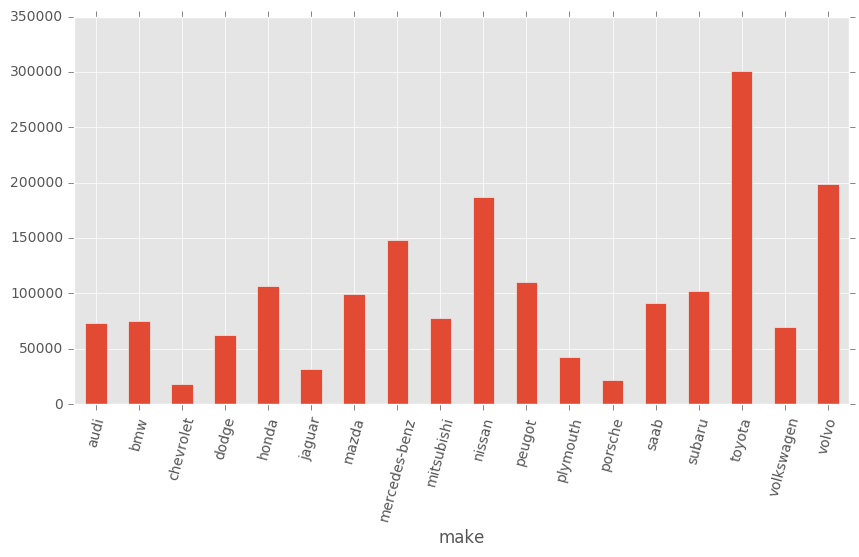

In [26]:
## Now let's plot this visually using the plot() method that is from matplotlib
auto.groupby('make')['price'].sum().plot(kind = 'bar', rot = 75, figsize = (10,5))

If you want to find the number of unique values in a column then I use **.nunique()**. For example, you group the cars by their style and then subset it by the **make** column to create your groupby object to which you apply **.nunique()** to get the count of unique car makers that are present in each style segment.

In [58]:
auto.groupby('style')['make'].nunique()

style
convertible     2
hardtop         3
hatchback      12
sedan          17
wagon           8
Name: make, dtype: int64

<p style="text-align:justify">Remember **.describe()** that we used earlier to get some basic statistics about our data frame? Well we can use it on a groupby object as well. So in this case you want to get some basic statistics of your cars' miles per gallon in the city grouped by the type of fuel that their engines combust. Like earlier, you use **.groupby** to first create a groupby object, subset it based on the **city-mpg** column and then perform the **.describe()** operation on it. You see that your cars that run on diesel are on average more fuel efficient than those that run on gas. It is however important to note here that you have way more cars in your inventory that run on gas than on diesel so this might be affecting your statistics.</p>

In [27]:
## Descriptive statistics of the mpg
auto.groupby('type')['city-mpg'].describe()

type         
diesel  count     15.000000
        mean      30.400000
        std        7.238784
        min       22.000000
        25%       24.000000
        50%       28.000000
        75%       37.000000
        max       45.000000
gas     count    144.000000
        mean      26.118056
        std        5.848312
        min       15.000000
        25%       23.000000
        50%       26.000000
        75%       31.000000
        max       49.000000
Name: city-mpg, dtype: float64

<p style="text-align:justify">Similarly, you can use **.mean()** to find the mean of values in the groups that you create. Like shwon beloew, you can use it to plot which car make has the highest mean prices. This is again depends on the number of cars in each category but you can see that Jaguar, Mercedez-Benz and Porsche clinch the top three spots accordingly.</p>

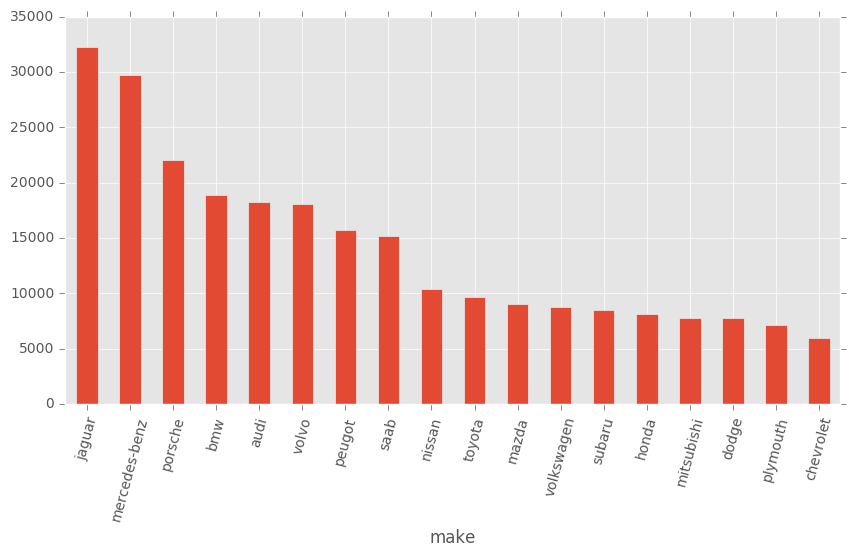

In [28]:
#Mean price across all makes
auto.groupby('make')['price'].mean().sort_values(ascending = False).plot(kind = 'bar', rot = 75, figsize = (10,5))

<p style="text-align:justify">You can also group by two columns by passing a list with the column names as parameters in **.groupby()**. Like shown below we've used this style of grouping to compute the mean price of cars grouped first by their make and then by the style.</p>

In [29]:
auto.groupby(['make', 'style'])['price'].mean()

make           style      
audi           sedan          18246.250000
bmw            sedan          18857.500000
chevrolet      hatchback       5723.000000
               sedan           6575.000000
dodge          hatchback       7819.800000
               sedan           7150.500000
               wagon           8921.000000
honda          hatchback       7054.428571
               sedan           9945.000000
               wagon           7295.000000
jaguar         sedan          32250.000000
mazda          hatchback       8128.333333
               sedan          10222.000000
mercedes-benz  convertible    35056.000000
               hardtop        28176.000000
               sedan          28576.000000
               wagon          28248.000000
mitsubishi     hatchback       7399.000000
               sedan           8434.000000
nissan         hardtop         8249.000000
               hatchback      14409.000000
               sedan           8604.555556
               wagon       

<p style="text-align:justify">Suppose you would like to compare the avegrage miles per gallon values both in the city and on the highway for the cars grouped by their style, simple create the groupby object and then subset it based on both the **city-mpg** and **highway-mpg** column and then plot it to get a nice visual like below.</p>

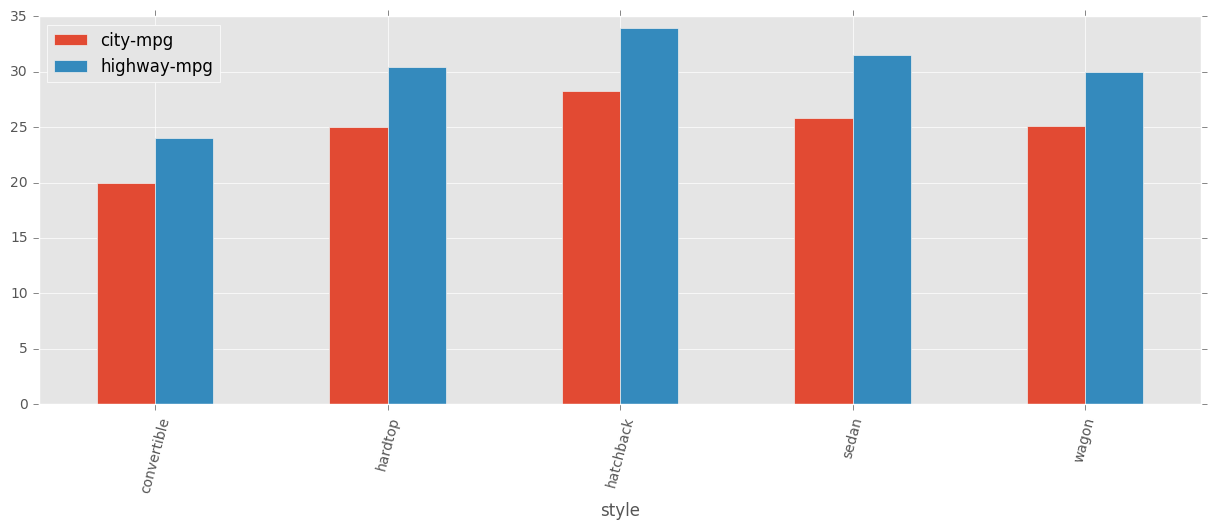

In [30]:
##For each make, howw does the mean city mpg compare to the mean high-way mpg?
auto.groupby('style')['city-mpg', 'highway-mpg'].mean().plot(kind = 'bar', rot = 75, figsize = (15,5))

<h2>Aggregation</h2>

<p style="text-align:justify">Lastly, let's explore aggregation which allows you to compute mulitple statistics for columns in your groupby object through the **.agg()** function. The parameter this function takes in a python dictionary that contains the columns to compute staistics on and the operation to be performed. 

Say you wanted to create a report on the mean price of each car categorizes by their make and also the total number of cars in each category. You first create the dictionary with the **price** key to signify that you want operations to be performed on the **price** column and then define its value as **mean** which referes to the mean operation to be performed on that column. Similarly, you create another key, **make** referring to the **make** column and the value is **count** to find the total cars in each.</p>

In [38]:
ops = { 'price': 'mean',
        'make': 'count'}
auto.groupby('make').agg(ops)

,price,make
make,,
audi,18246.250000,4
bmw,18857.500000,4
chevrolet,6007.000000,3
dodge,7790.125000,8
honda,8184.692308,13
jaguar,32250.000000,1
mazda,9080.000000,11
mercedes-benz,29726.400000,5
mitsubishi,7813.000000,10


<p style="text-align:justify">But really, you want this to be more clean in terms of naming the new columns that you have created. And if you also want to compute multiple statistics per column, then we must pass a nested dictionary as the parameter.</p>

In [53]:
ops = { 'price': { 'max_price': 'max',
                    'min_price': 'min',
                     'avg_price': 'mean'},
        'horsepower': { 'max_bhp': 'max', 
                        'min_bhp': 'min',
                        'mean_bhp': 'mean'}
      }
auto.groupby('make').agg(ops)

horsepower                     price                        
                 mean_bhp min_bhp max_bhp min_price max_price     avg_price
make                                                                       
audi           116.750000   102.0   140.0   13950.0   23875.0  18246.250000
bmw            111.000000   101.0   121.0   16430.0   21105.0  18857.500000
chevrolet       62.666667    48.0    70.0    5151.0    6575.0   6007.000000
dodge           84.375000    68.0   145.0    5572.0   12964.0   7790.125000
honda           80.230769    58.0   101.0    5399.0   12945.0   8184.692308
jaguar         176.000000   176.0   176.0   32250.0   32250.0  32250.000000
mazda           80.000000    68.0   120.0    5195.0   18280.0   9080.000000
mercedes-benz  129.400000   123.0   155.0   25552.0   35056.0  29726.400000
mitsubishi      91.800000    68.0   116.0    5389.0    9959.0   7813.000000
nissan         102.555556    55.0   200.0    5499.0   19699.0  10415.666667
peugot         102.285714    95.0   142.0   11900.0   18150.0  15758.571429
plymouth        77.000000    68.0   102.0    5572.0    8921.0   7163.333333
porsche        143.000000   143.0   143.0   22018.0   22018.0  22018.000000
saab           126.666667   110.0   160.0   11850.0   18620.0  15223.333333
subaru          86.250000    69.0   111.0    5118.0   11694.0   8541.250000
toyota          90.741935    56.0   161.0    5348.0   17669.0   9696.645161
volkswagen      77.125000    52.0   100.0    7775.0    9995.0   8738.125000
volvo          128.000000   106.0   162.0   12940.0   22625.0  18063.181818

<p style="text-align:justify">So there you have it, a quick introduction to some very useful operations using python pandas. If you are new to pandas, I hope this has sparked your curiosity to learn more about it and if you're already familiar with using pandas, I hope that you've enjoyed my take on using pandas. Either way please leave questions and/ or comments. I will be back with more posts very soon!</p>

<h2>References</h2>
<p style="text-align:justify">My inspiration for these posts came from a couple of other blogs that I have been reading. I encourage you to also chceck out the following posts that talk about pandas:</p>

* [Greg Reda's pandas tutorial](http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/)
* [Chris Moffit's pandas pivot table tutorial](http://pbpython.com/pandas-pivot-table-explained.html)
* [Chris Albon's pandas group operations tutorial](https://chrisalbon.com/python/pandas_apply_operations_to_groups.html)
* [Shane Lynn's tutorial on pandas grouping & aggregation](http://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)